# __PROYECTO INDIVIDUAL Nº 2__ | MACHINE LEARNING 

### IMPORTO LAS LIBRERIAS QUE USO DURANTE EL PROYECTO

In [1]:
#Estas dos primeras librerias importo por buena costumbre

import pandas as pd
import numpy as np

#Estas otras librerias fui agregando a medida que las necesitaba para continuar con el proyecto

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import OrdinalEncoder
import warnings

### EMPIEZO A DESARROLLAR LA EXTRACCION DE LOS DATOS 

este código sirve para desabilitar las leyendas que hay en algunos resultados de los codigos


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)   

importo el archivo de entrenamiento para desarrollar el proyecto, y observo lo que contiene 

In [3]:
entrenamiento = pd.read_csv('hospitalizaciones_train.csv')
entrenamiento.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


### A CONTINUACIÓN TRANSFORMO LOS DATOS DE LAS COLUMNAS, CAMBIO LOS QUE SON ALFANUMÉRICOS A NUMÉRICOS

In [4]:
le = preprocessing.LabelEncoder()
entrenamiento['Insurance'] = le.fit_transform(entrenamiento['Insurance'])
entrenamiento['health_conditions'] = le.fit_transform(entrenamiento['health_conditions'])

entrenamiento['Type of Admission'] = le.fit_transform(entrenamiento['Type of Admission'])
entrenamiento['gender'] = le.fit_transform(entrenamiento['gender'])

entrenamiento['doctor_name'] = le.fit_transform(entrenamiento['doctor_name'])
entrenamiento['Ward_Facility_Code'] = le.fit_transform(entrenamiento['Ward_Facility_Code'])
entrenamiento['Department'] = le.fit_transform(entrenamiento['Department'])

In [5]:
enc = OrdinalEncoder()
entrenamiento['Age'] = le.fit_transform(entrenamiento['Age'])
entrenamiento['Severity of Illness'] = le.fit_transform(entrenamiento['Severity of Illness'])

### CREO UNA COLUMNA DONDE A TRAVÉS DE UN SISTEMA BINARIO, SE CORRELACION CON LA COLUMNA DE ESTADIA EN EL HOSPITAL, DONDE SI LA ESTADIA ES MAYOR A 8 DIAS LA COLUMNA LLEVARA EL VALOR DE 1, DE LO CONTRARIO TOMA EL VALOR 0

In [6]:
entrenamiento['pred'] = np.where(entrenamiento['Stay (in days)']> 8, 1,0)

### CREO UN MAPA DE CALOR CON LOS VALORES TRANSFORMADOS DE MI DATAFRAME PARA PODER ENCONTRAR UNA RELACION ENTRE ELLAS

In [18]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(20,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bott

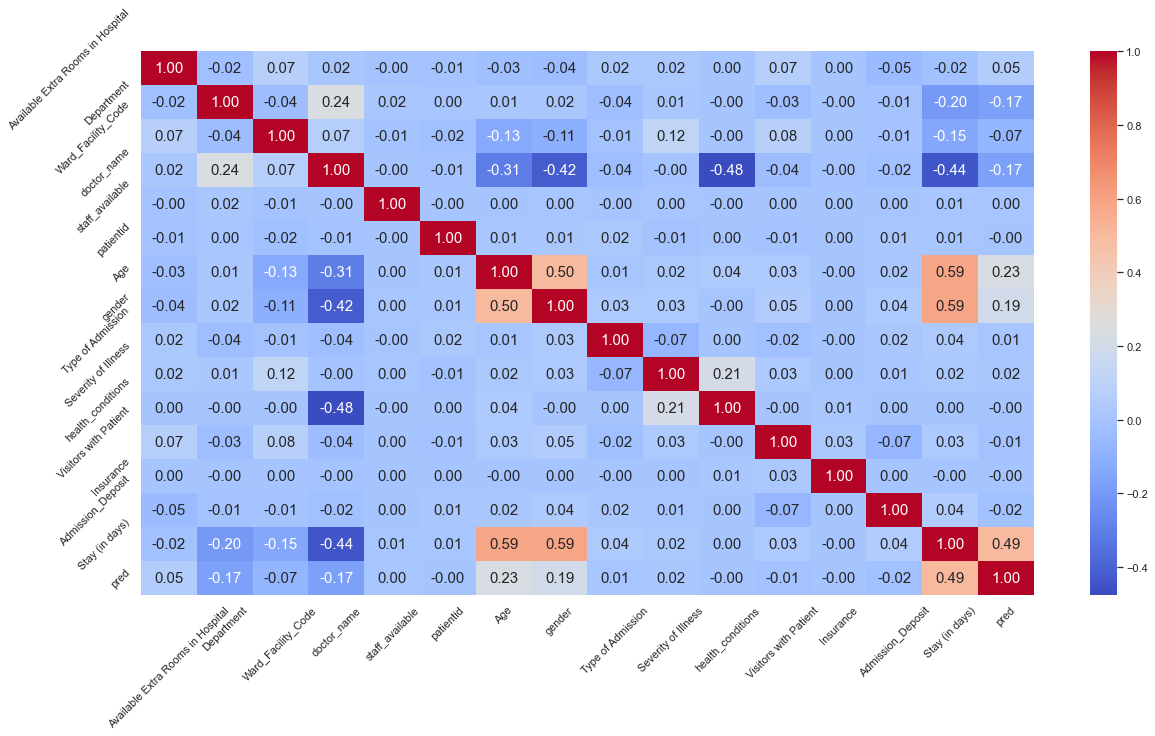

In [19]:
corr = entrenamiento.corr()
plot_corre_heatmap(corr)

In [20]:
entrenamiento.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),pred
0,4,2,3,8,0,33070,4,0,1,0,1,4,1,2966.408696,8,0
1,4,2,1,8,2,34808,3,0,1,1,2,2,0,3554.835677,9,1
2,2,2,1,8,8,44577,2,0,1,0,1,2,1,5624.733654,7,0
3,4,2,3,4,7,3695,3,0,2,2,4,4,0,4814.149231,8,0
4,2,1,4,2,10,108956,7,1,1,2,1,2,0,5169.269637,34,1


### SELECCIONO LAS COLUMNAS QUE EN MI ANALISIS TUVIERON MAS CORRELACION ENTRE SI, SON LAS COLUMNAS DE MAYOR VALOR CERCANOS A 1

In [7]:
entrenamiento = entrenamiento[['Age','gender','doctor_name','Department','pred']]

OBSERVO COMO ME QUEDO EL DATAFRAME 

In [8]:
entrenamiento.head()

,Age,gender,doctor_name,Department,pred
0,4,0,8,2,0
1,3,0,8,2,1
2,2,0,8,2,0
3,3,0,4,2,0
4,7,1,2,1,1


ASIGNO VALORES A "Y" A "X" PARA PODER ENTRENAR MI MODELO

In [10]:
X = entrenamiento.iloc[:,0:3]
y = entrenamiento.iloc[:,4]

ELIJO MI MODELO A TRABAJAR: ARBOL DE DECICIÓN 

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth= 8 ,random_state=42)

In [25]:
clf.fit(X.values, y.values)

DecisionTreeClassifier(max_depth=8, random_state=42)

AQUÍ VEO LA IMPORTANCIA DE LOS DATOS TRABAJADOS, DONDE MI COLUMNA "AGE" ES LA COLUMNA MAS IMPORTANTE CON UN VALOR DEL 74% DE RELEVANCIA

In [26]:
print(clf.feature_importances_)

[0.74471548 0.07068646 0.18459806]


In [27]:
y_pred = clf.predict(X.values)

POR ÚLTIMO SACO MI VALOR DE ACCURACY PARA VER EL RESULTADO DEL MODELO

In [28]:
from sklearn.metrics import accuracy_score

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(accuracy_score(y,y_pred))

[0 1]
2
3
0.6753073170731707


### IMPORTO EL ARCHIVO DE TESTEO PARA PODER TRABAJARLO Y CUMPLIR CON LA CONSIGNA DEL PROYECTO

In [29]:
testeo = pd.read_csv('hospitalizaciones_test.csv')

In [30]:
testeo.head(3)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882


### TRANSFORMO DE IGUAL MANERA LAS COLUMNAS DE MI ARCHIVO TESTEO, DE COMO HICE CON MI ARCHIVO DE ENTRENAMIENTO, PARA HOMOGENEIZAR LOS DATOS

In [31]:
le = preprocessing.LabelEncoder()
testeo['Insurance'] = le.fit_transform(testeo['Insurance'])
testeo['health_conditions'] = le.fit_transform(testeo['health_conditions'])

testeo['Type of Admission'] = le.fit_transform(testeo['Type of Admission'])
testeo['gender'] = le.fit_transform(testeo['gender'])

testeo['doctor_name'] = le.fit_transform(testeo['doctor_name'])
testeo['Ward_Facility_Code'] = le.fit_transform(testeo['Ward_Facility_Code'])
testeo['Department'] = le.fit_transform(testeo['Department'])

In [32]:
enc = OrdinalEncoder()
testeo['Age'] = le.fit_transform(testeo['Age'])
testeo['Severity of Illness'] = le.fit_transform(testeo['Severity of Illness'])

ELIJO LAS MISMAS COLUMNAS CON LAS QUE TRABAJE EN MI ARCHIVO DE ENTRENAMIENTO

In [33]:
testeo = testeo[['Age','gender','doctor_name','Department']]

EMPIEZO A TRABAJAR CON MI MODELO ELEJIDO PERO CON EL ARCHIVO DE TESTEO

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth= 8 ,random_state=42)

SELECCIONO MIS COLUMNAS CON LAS QUE VOY A TRABAJAR

In [43]:
testeo = testeo.iloc[:,0:3]

ASIGNO VALORES A LOS EJES X,Y

In [44]:
clf.fit(X.values, y.values)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [50]:
y_pred_t=clf.predict(testeo)

C:\Users\Beto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


CONVIERTO "TESTEO" A UN DATAFRAME

In [46]:
df_test = pd.DataFrame(y_pred_t) 

CREO LA COLUMNA REQUERIDA, Y DEJO SOLO ESA COLUMNA

In [47]:
df_test = df_test.rename(columns={0:'pred'})

ASIGNO EL NOMBRE REQUERIDO EN EL PROYECTO A MI DATAFRAME TRABAJADO, PARA LUEGO SUBIRLO

In [48]:
df_test.to_csv('norberto2906.csv', index=False)